In [1]:
library(tidyverse)
install.packages("lubridate")  
library(lubridate)
library(dplyr)
library(readr)
library(ggplot2)

players <- read_csv("https://raw.githubusercontent.com/Elvis614412/Dsci-100-group-project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Elvis614412/Dsci-100-group-project/refs/heads/main/sessions.csv")

merged_data <- left_join(players,sessions, by = "hashedEmail")

merged_data <- merged_data|>
    select(-hashedEmail,-original_start_time,-original_end_time)
    merged_data$Age[is.na(merged_data$Age)] <- mean(merged_data$Age, na.rm = TRUE)

merged_data


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Colum

experience,subscribe,played_hours,name,gender,Age,start_time,end_time
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Pro,TRUE,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35
Pro,TRUE,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37
Pro,TRUE,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25
Pro,TRUE,30.3,Morgan,Male,9,10/09/2024 15:07,10/09/2024 15:29
Pro,TRUE,30.3,Morgan,Male,9,05/05/2024 22:21,05/05/2024 23:17
Pro,TRUE,30.3,Morgan,Male,9,06/04/2024 22:24,06/04/2024 23:33
Pro,TRUE,30.3,Morgan,Male,9,20/04/2024 20:46,20/04/2024 21:48
Pro,TRUE,30.3,Morgan,Male,9,15/06/2024 16:37,15/06/2024 18:37
Pro,TRUE,30.3,Morgan,Male,9,05/05/2024 23:40,06/05/2024 00:55


**3. Which gender has more sessions? (gender vs total sessions)**

gender,total_sessions
<chr>,<int>
Agender,11
Female,395
Male,1056
Non-binary,113
Other,1
Prefer not to say,24
Two-Spirited,6


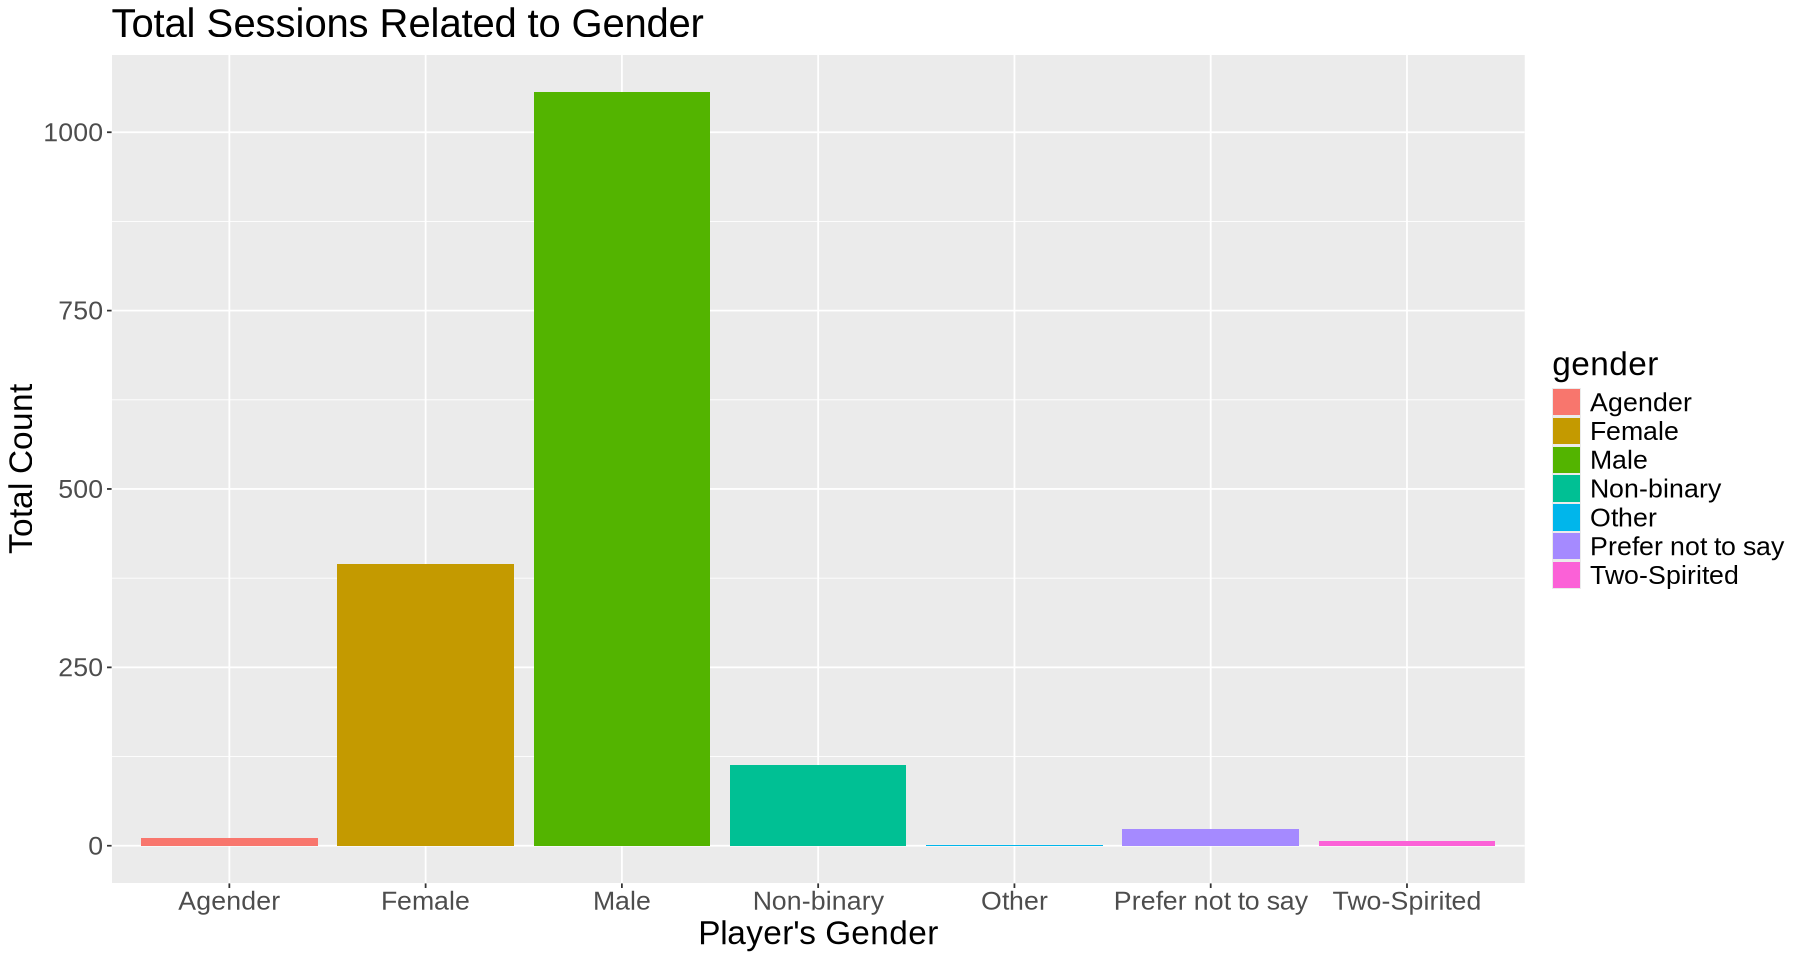

In [4]:
gender_sessions <- merged_data |>
filter(!is.na(gender)) |>
select(name, gender, start_time, end_time) |>
group_by(gender) |>
summarize(total_sessions=n()) 
gender_sessions

options(repr.plot.width = 15, repr.plot.height = 8)
gender_sessions_plot <- gender_sessions |>
ggplot(aes(x=gender, y=total_sessions, fill=gender)) +
geom_bar(stat="identity") +
labs(title="Total Sessions Related to Gender", x="Player's Gender", y="Total Count") +
theme(text = element_text(size=20))
gender_sessions_plot

**Steps**
1. Filter out rows with missing gender(NA) from gender column using `filter` function.
2. Select five column names (name, gender, start_time, end_time, session_duration) from data using `select` function.
3. Group the data by gender using `group_by` function.
4. Calculate total number of rows in sessions data for each gender using `summarize` function, then make a new name: total_sessions.
5. Print out gender_sessions.
6. Create a plot for relationship between gender and total sessions using gender_sessions data.
7. Using x = gender, y = total_sessions and fill gender to create a bar chart and create a title and each name of xlab and ylab using `labs` to combine it.

**Relationship with question2**
1. What I do is to research how a player's gender contributed to the large amount of data for the game. Then, I used different functions to create a final plot that can illustrate which gender contributed most, least and middle.
2. Firstly, I used a `filter` function and an argument !is.na to extract the gender's column rows in the merged data frame and find the values which are not NA.
3. In addition, using the `select` function to choose which columns I can use in this research, I choose name, gender, start time and end time columns to solve this research. Name and gender columns can help us know each player's names and which gender are they. Also, start time and end time columns can help us know how long they spent on game.
4. Thirdly, using `group_by` and `summarize` functions to split the gender column to each column and make a column name total_sessions and calculate each column to find values.
5. Last but not least, using the `ggplot` function to create a bar chart and find the total distribution for each genders.
6. Finally, the bar shows the most, least and middle contributed for each genders. *Male* gender contributed most for this game which is in the upper 1000. *Other* gender contributed least for this game which is almost 0. Besides, second place is *Female*, third place is *Non-binary*, fourth place is *Prefer not to say*, fifth place is *Agender* and sixth place is *Two-Spirited*.
7. OVerall, I described the number of players related to gender and contribution from players for the game, so the most distributed is *Male* players and the least distributed is *Other* players.